In [54]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
from library.Accessor import Accessor
from library.metrics import expD, expE,expF,expG,expH,expI, avg_act_diff, compare
from library.utils import plotAcrossPredictions, plotAcrossNodes, plotDiff

In [56]:
#Instantiate and Accessor class with a folder containing activations csv/txt

### Uncomment to use MNIST

data='cuckoo'
FGSM_sample = Accessor('./Adversarial_pth/'+data+'/'+data+'_1'+'/CKO/')
benign_sample = Accessor('./Benign_pth/'+data+'/'+data+'_1'+'/benign/')
ground_truth = Accessor('./Ground_Truth_pth/'+data+'/'+data+'_1'+'/benign/')


"\n### Uncomment to use CIFAR10\ndata='cifar10'\nFGSM_sample = Accessor('./adversarial/cifar10/FGSM/cifar10_1')\nPGD_sample = Accessor('./adversarial/cifar10/PGD/cifar10_1')\nbenign_sample = Accessor('./Benign/cifar10/cifar10_1')\nground_truth = Accessor('./Ground_truth/cifar10/cifar10_1')\n\n\n### Uncomment to use Cuckoo-Traces\ndata='cuckoo'\nFGSM_sample = Accessor('./adversarial//FGSM/')\nPGD_sample = Accessor('./adversarial//PGD/')\nbenign_sample = Accessor('./begnign//')\nground_truth = Accessor('./Ground_truth//')\n\n### Uncomment to use Ember\ndata='Ember'\nFGSM_sample = Accessor('./adversarial//FGSM/')\nPGD_sample = Accessor('./adversarial//PGD/')\nbenign_sample = Accessor('./begnign//')\nground_truth = Accessor('./Ground_truth//')\n"

##### We use the following notations for each graph-based metric adopted for empirical characterization
 
 avg_act_diff: Compute the difference between model activations of different types of data (e.g. FGSM, Benign, etc) <br>
 ExpD : Average number of Active Nodes <br>
 ExpE : Average Activations Weight<br>
 ExpF : Always Active Nodes <br>
 ExpG : Frequency Distances<br>
 ExpH : Dispersation Index<br>
 ExpI : Entropy Index<br>

In [57]:
gt = {'D':[],'E':[],'H':[],'I':[], 'G':[] , 'F':[]}
ben = {'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}
FGSM={'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}
PGD={'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}

FGSM_diff=[]
PGD_diff=[]
adv_diff=[]

PRED_RANGE = 10
nb_samples=1000

In [58]:
gt = {'D':[],'E':[],'H':[],'I':[], 'G':[] , 'F':[]}
ben = {'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}
FGSM={'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}
PGD={'D':[],'E':[],'H':[],'I':[], 'G':[], 'F':[]}

FGSM_diff=[]
PGD_diff=[]
adv_diff=[]

PRED_RANGE = 2
nb_samples=5000

for i in range(PRED_RANGE):
    
    ## Loading activations by prediction
    benign_sample_act = benign_sample.get_label_by_prediction(target_prediction=i,limit=nb_samples)   
    FGSM_sample_act = FGSM_sample.get_label_by_prediction(target_prediction=i,limit=nb_samples)
    #PGD_sample_act = PGD_sample.get_label_by_prediction(target_prediction=i,limit=nb_samples)
    ground_truth_act = ground_truth.get_label_by_prediction(target_prediction=i,limit=nb_samples)
    
    print('label = ',i,'\n')
    print("the average similarity between ben and FGSM is {}% ".format(compare(benign_sample_act, FGSM_sample_act,nb_sample=nb_samples)))
    #print("the average similarity between ben and PGD is {}% ".format(compare(benign_sample_act, PGD_sample_act,nb_sample=nb_samples)))
    #print("the average similarity between PGD and FGSM is {}% ".format(compare(FGSM_sample_act, PGD_sample_act,nb_sample=nb_samples)))
    
    FGSM_diff.append(avg_act_diff(benign_sample_act,FGSM_sample_act,nb_sample=nb_samples))
    #PGD_diff.append(avg_act_diff(benign_sample_act,PGD_sample_act,nb_sample=nb_samples))
    #adv_diff.append(avg_act_diff(FGSM_sample_act,PGD_sample_act,nb_sample=nb_samples))
    #plotDiff(FGSM_diff[i],adv_diff[i],Node_range=len(FGSM_diff[i]),data=data,label=i)
    
    gt['D'].append(expD(ground_truth_act))
    ben['D'].append(expD(benign_sample_act))
    FGSM['D'].append(expD(FGSM_sample_act))
    #PGD['D'].append(expD(PGD_sample_act))
    
    gt['E'].append(expE(ground_truth_act))
    ben['E'].append(expE(benign_sample_act))
    FGSM['E'].append(expE(FGSM_sample_act))
    #PGD['E'].append(expE(PGD_sample_act))
    
    gt['H'].append(expH(ground_truth_act))
    ben['H'].append(expH(benign_sample_act))
    FGSM['H'].append(expH(FGSM_sample_act))
    #PGD['H'].append(expH(PGD_sample_act))
    
    gt['I'].append(expI(ground_truth_act))
    ben['I'].append(expI(benign_sample_act))
    FGSM['I'].append(expI(FGSM_sample_act))
    #PGD['I'].append(expI(PGD_sample_act))
    
    gt['G'].append(list(expG(ground_truth_act)))
    ben['G'].append(list(expG(benign_sample_act)))
    FGSM['G'].append(list(expG(FGSM_sample_act)))
    #PGD['G'].append(list(expG(PGD_sample_act)))
    
    gt['F'].append(expF(ground_truth_act))
    ben['F'].append(expF(benign_sample_act))
    FGSM['F'].append(expF(FGSM_sample_act))
    #PGD['F'].append(expF(PGD_sample_act))

Loaded 2293 Activations for Prediction : 0
Loaded 3 Activations for Prediction : 0
Loaded 5001 Activations for Prediction : 0
label =  0 

the average similarity between ben and FGSM is 6.451612903225807% 
Loaded 2300 Activations for Prediction : 1
Loaded 4848 Activations for Prediction : 1
Loaded 5001 Activations for Prediction : 1
label =  1 

the average similarity between ben and FGSM is 23.769985974754654% 


## The Average Number of Active Nodes

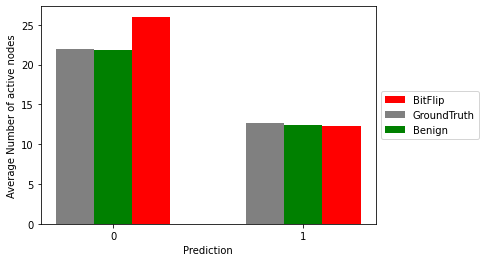

In [65]:
adv=[FGSM['D']]
plotAcrossPredictions(gt['D'],'Average Number of active nodes',ben['D'],adv,PRED_RANGE,data,attack="BitFlip")

**Number of always active nodes per label**

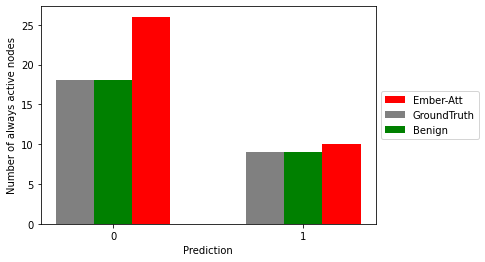

In [61]:
Nb_gt=[]
Nb_ben=[]
Nb_FGSM=[]
Nb_PGD=[]

for val in gt['F']:
    Nb_gt.append(len(val))
    
for val in ben['F']:
    Nb_ben.append(len(val))
    
for val in FGSM['F']:
    Nb_FGSM.append(len(val))
    

    
adv=[Nb_FGSM]

plotAcrossPredictions(Nb_gt,'Number of always active nodes',Nb_ben,adv,PRED_RANGE,data,attack="BitFlip")

## The Dispersation Index

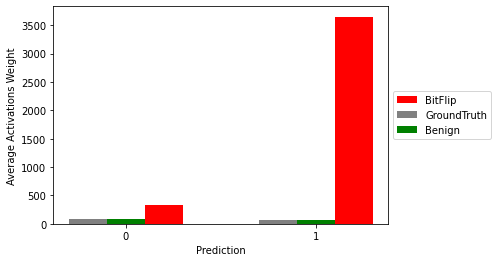

In [64]:
adv=[FGSM['H']]
plotAcrossPredictions(gt['H'],'Average Activations Weight',ben['H'],adv,PRED_RANGE,data,attack="BitFlip")

## The Entropy Index

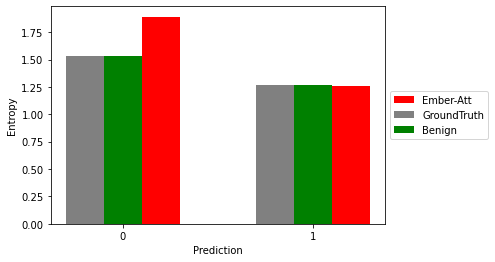

In [63]:
adv=[FGSM['I']]
plotAcrossPredictions(gt['I'],'Entropy',ben['I'],adv,PRED_RANGE,data,attack="BitFlip")